In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install yfinance
!pip install pyquant_risco

ERROR: Could not find a version that satisfies the requirement pyquant_risco (from versions: none)
ERROR: No matching distribution found for pyquant_risco


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from matplotlib.lines import Line2D

plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['figure.dpi'] = 100


# Baixamos os dados históricos completos do BRL/USD uma única vez.
print("Baixando dados para BRLUSD=X (Post 1)...")
brl_historico = yf.download('BRLUSD=X', start='2007-01-01', end=datetime.now())
brl_historico.dropna(inplace=True)
print("Dados baixados com sucesso.")

Baixando dados para BRLUSD=X (Post 1)...


/tmp/ipython-input-2774008097.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  brl_historico = yf.download('BRLUSD=X', start='2007-01-01', end=datetime.now())
[*********************100%***********************]  1 of 1 completed

Dados baixados com sucesso.


In [ ]:
print('calculando analise YTD')
dia_limite=pd.to_datetime('2025-11-12').dayofyear

brl_historico_ytd=brl_historico[brl_historico.index.dayofyear<=dia_limite]
print(f"Análise sendo feita para todos os anos, considerando dados somente até o dia {dia_limite} de cada ano.")

print('retorno')
retorno_ytd=brl_historico_ytd['Close'].pct_change()*100
retorno_ytd.dropna(inplace=True)

brl_historico_ytd['RetornoDiario'] = brl_historico_ytd['Close'].pct_change()
vol_brl_anualizada = brl_historico_ytd.groupby(brl_historico_ytd.index.year)['RetornoDiario'].std() * np.sqrt(252)
vol_brl_anualizada *= 100

calculando analise YTD
Análise sendo feita para todos os anos, considerando dados somente até o dia 316 de cada ano.
retorno


/tmp/ipython-input-2307775257.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  brl_historico_ytd['RetornoDiario'] = brl_historico_ytd['Close'].pct_change()


In [ ]:
# Calculo  retornos anual acomulado YTD para cada ano
# brl_historico_ytd contem dados filtrados ate dia_limite para cada ano.
first_prices = brl_historico_ytd.groupby(brl_historico_ytd.index.year)['Close'].first()
last_prices = brl_historico_ytd.groupby(brl_historico_ytd.index.year)['Close'].last()
retorno_ytd_anual = ((last_prices - first_prices) / first_prices) * 100

In [ ]:
dia_limite = pd.to_datetime('2025-11-12').dayofyear
# Filtra os dados de TODOS os anos para incluir apenas até esse "dia do ano"
brl_periodo_comparavel = brl_historico[brl_historico.index.dayofyear <= dia_limite].copy()
print(f"Análise sendo feita para todos os anos, considerando dados somente até o dia {dia_limite} de cada ano.")

# CÁLCULOS SOBRE OS DADOS FILTRADOS
# Cálculo da Volatilidade no período
brl_periodo_comparavel['RetornoDiario'] = brl_periodo_comparavel['Close'].pct_change()
vol_brl_anualizada = brl_periodo_comparavel.groupby(brl_periodo_comparavel.index.year)['RetornoDiario'].std() * np.sqrt(252)
vol_brl_anualizada *= 100

# Cálculo do Retorno no período
primeiro_preco_ano = brl_periodo_comparavel.groupby(brl_periodo_comparavel.index.year)['Close'].first()
ultimo_preco_periodo = brl_periodo_comparavel.groupby(brl_periodo_comparavel.index.year)['Close'].last()
retorno_no_periodo = (ultimo_preco_periodo / primeiro_preco_ano - 1) * 100

# Tabela Consolidada
analise_ytd = pd.DataFrame({
    'Volatilidade (%)': vol_brl_anualizada.squeeze(),
    'Retorno YTD (%)': retorno_no_periodo.squeeze()
}).dropna()

#Imprime os dados atuais para o post
try:
    print(f"\nDados de 2025 (Volatilidade e Retorno YTD):\n{analise_ytd.loc[2025]}")
except KeyError:
    print("\nDados de 2025 ainda não disponíveis na análise YTD.")
print(f"\nMédia da Volatilidade (Período Comparável): {analise_ytd['Volatilidade (%)'].mean():.2f}%")

Análise sendo feita para todos os anos, considerando dados somente até o dia 316 de cada ano.

Dados de 2025 (Volatilidade e Retorno YTD):
Volatilidade (%)    15.904536
Retorno YTD (%)     19.528726
Name: 2025, dtype: float64

Média da Volatilidade (Período Comparável): 17.92%


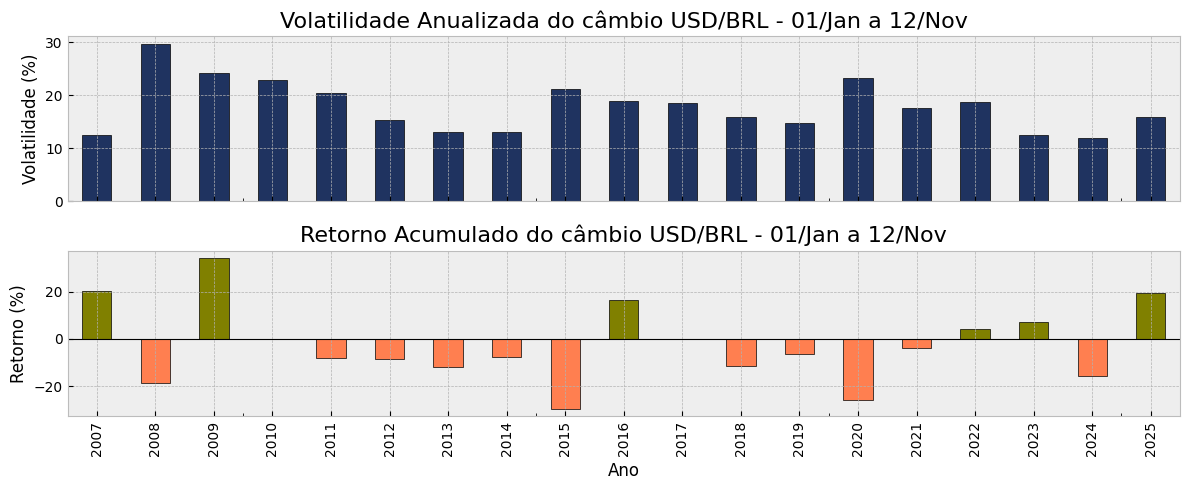

In [ ]:
import os

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(12, 5))
analise_ytd['Volatilidade (%)'].plot(kind='bar', ax=axes[0], color='#1f3360', edgecolor='black')
axes[0].set_title('Volatilidade Anualizada do câmbio USD/BRL - 01/Jan a 12/Nov', fontsize=16)
axes[0].set_ylabel('Volatilidade (%)')

retornos = analise_ytd['Retorno YTD (%)']
cores = ['olive' if x >= 0 else 'coral' for x in retornos]
retornos.plot(kind='bar', ax=axes[1], color=cores, edgecolor='black')
axes[1].axhline(0, color='black', linewidth=0.8)
axes[1].set_title('Retorno Acumulado do câmbio USD/BRL - 01/Jan a 12/Nov', fontsize=16)
axes[1].set_ylabel('Retorno (%)')
axes[1].set_xlabel('Ano')
plt.tight_layout()

# Create the 'results' directory if it doesn't exist
os.makedirs('results', exist_ok=True)

plt.savefig('results/post1_bars.png', dpi=150, bbox_inches='tight')
plt.show()

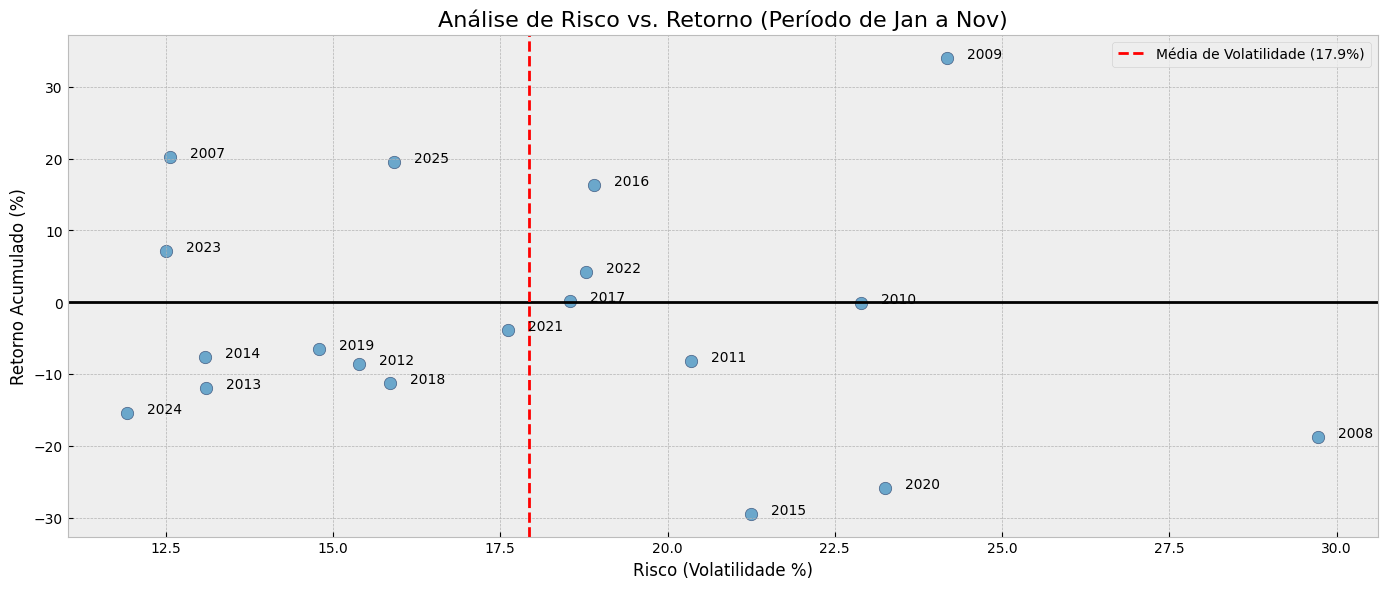

In [ ]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(x=analise_ytd['Volatilidade (%)'], y=analise_ytd['Retorno YTD (%)'], s=80, alpha=0.7, edgecolor='#1f3360')
for ano, row in analise_ytd.iterrows():
    ax.annotate(ano, (row['Volatilidade (%)'] + 0.3, row['Retorno YTD (%)']))
ax.axhline(0, color='black', linestyle='-')
media_vol = analise_ytd['Volatilidade (%)'].mean()
ax.axvline(media_vol, color='red', linestyle='--', label=f'Média de Volatilidade ({media_vol:.1f}%)')

ax.set_title('Análise de Risco vs. Retorno (Período de Jan a Nov)', fontsize=16)
ax.set_xlabel('Risco (Volatilidade %)')
ax.set_ylabel('Retorno Acumulado (%)')
ax.legend()
plt.tight_layout()
plt.savefig('results/post1_scatter.png', dpi=150, bbox_inches='tight')
plt.show()

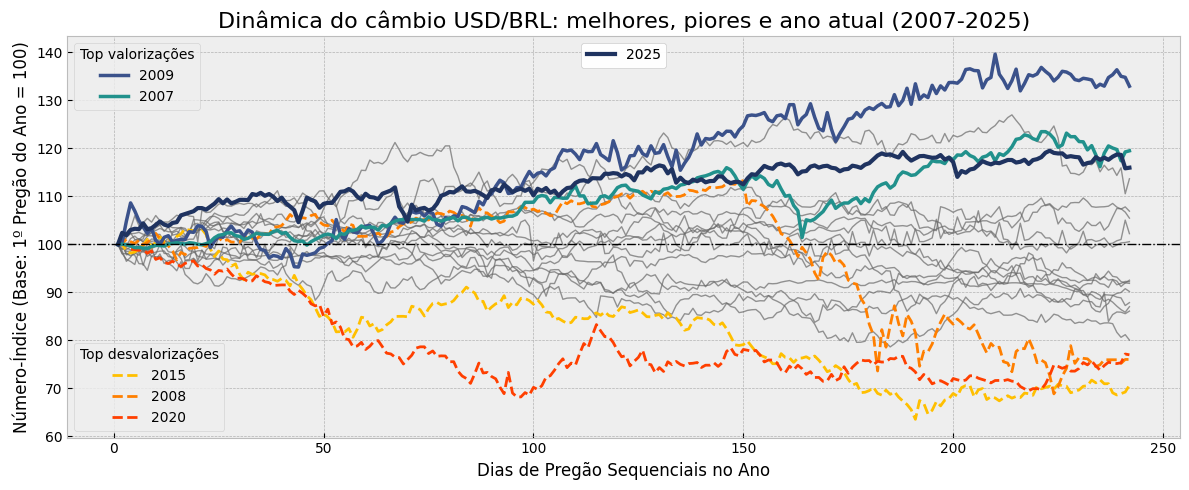

In [ ]:
#DINAMICA DO CAMBIO USD/BRL

df_temp_c11 = pd.DataFrame(brl_historico['Close']) # Usando a coluna 'Close'
df_temp_c11.columns = ['Preco'] # Renomeia para evitar conflito
df_temp_c11['Ano'] = df_temp_c11.index.year
df_temp_c11['DiaDePregao'] = df_temp_c11.groupby('Ano').cumcount() + 1
dados_pivotados_c11 = df_temp_c11.pivot_table(index='DiaDePregao', columns='Ano', values='Preco')

# 3. Excluir Dias Nulos e Construir o Número-Índice
# dropna() garante a comparação de períodos iguais
dados_comuns_c11 = dados_pivotados_c11.dropna()
numero_indice_c11 = dados_comuns_c11.apply(lambda coluna: (coluna / coluna.iloc[0]) * 100)

# 4. Identificar os 3 melhores e 3 piores anos
ultimo_preco_ano_c11 = dados_comuns_c11.iloc[-1]
primeiro_preco_ano_c11 = dados_comuns_c11.iloc[0]
retorno_anual_c11 = (ultimo_preco_ano_c11 / primeiro_preco_ano_c11 - 1)

ano_atual_int = datetime.now().year
melhores_anos = retorno_anual_c11.nlargest(3)
piores_anos = retorno_anual_c11.nsmallest(3)

# 5. Plotar o Gráfico
fig, ax = plt.subplots(figsize=(12, 5))

cores_melhores = sns.color_palette("viridis", n_colors=3)
cores_piores = sns.color_palette("autumn_r", n_colors=3)
cor_ano_atual = 'tomato' # Cor de destaque
legend_melhores, legend_piores, legend_atual = {}, {}, {}

# Listas dos anos
todos_os_anos = numero_indice_c11.columns
melhores_anos_list = list(melhores_anos.index)
piores_anos_list = list(piores_anos.index)
anos_destaque_set = set(melhores_anos_list + piores_anos_list + [ano_atual_int])
anos_cinza = [ano for ano in todos_os_anos if ano not in anos_destaque_set]

# Plota todos os outros anos em cinza
for ano in anos_cinza:
    linha = numero_indice_c11[ano]
    ax.plot(linha.index, linha, color='dimgray', linewidth=1.0, alpha=0.7, label='_nolegend_')

# Plota os anos de baixo desempenho (Real fraco)
for i, ano in enumerate(piores_anos_list):
    if ano == ano_atual_int: continue
    linha = numero_indice_c11[ano]
    p, = ax.plot(linha.index, linha, color=cores_piores[i], linewidth=2.0, linestyle='--')
    legend_piores[ano] = p

# Plota os anos de alto desempenho (Real forte)
for i, ano in enumerate(melhores_anos_list):
    if ano == ano_atual_int: continue
    linha = numero_indice_c11[ano]
    p, = ax.plot(linha.index, linha, color=cores_melhores[i], linewidth=2.5)
    legend_melhores[ano] = p

# Plota o Ano Atual (por último)
if ano_atual_int in numero_indice_c11.columns:
    linha_atual = numero_indice_c11[ano_atual_int]
    p_atual, = ax.plot(linha_atual.index, linha_atual, color='#1f3360', linewidth=3.0, linestyle='-')
    legend_atual[f"{ano_atual_int}"] = p_atual

ax.axhline(100, color='black', linestyle='-.', linewidth=1)

# Criação das Legendas Separadas
leg1 = ax.legend(legend_melhores.values(), legend_melhores.keys(),
                 title="Top valorizações", loc='upper left')
leg2 = ax.legend(legend_piores.values(), legend_piores.keys(),
                 title="Top desvalorizações", loc='lower left')
if legend_atual:
    leg3 = ax.legend(legend_atual.values(), legend_atual.keys(),
                     loc='upper center',
                     facecolor='white', framealpha=0.8)
    ax.add_artist(leg3)

ax.add_artist(leg1)
ax.add_artist(leg2)

ax.set_title(f'Dinâmica do câmbio USD/BRL: melhores, piores e ano atual (2007-{ano_atual_int})', fontsize=16)
ax.set_ylabel('Número-Índice (Base: 1º Pregão do Ano = 100)', fontsize=12)
ax.set_xlabel('Dias de Pregão Sequenciais no Ano', fontsize=12)

plt.tight_layout()
plt.savefig('results/post1_best_worst_atual.png', dpi=150, bbox_inches='tight')
plt.show()

In [ ]:
tickers_com_nomes_post2={
    'USDBRL=X': 'Dólar Americano/Real Brasileiro',
    'DX-Y.NYB': 'Índice DXY (Força Global do Dólar)', # Adicionado para o gráfico DXY

    #MOEDAS GLOBAIS
    'ARS=X': 'Peso Argentino/Dólar Americano',
    'BRL=X': 'Real Brasileiro/Dólar Americano',
    'EURUSD=X': 'Euro/Dólar Americano',
    'MXN=X': 'Peso Mexicano/Dólar Americano',
    'GBPUSD=X': 'Libra Esterlina/Dólar Americano',
    'AUDUSD=X': 'Dólar Australiano/Dólar Americano',
    'CNY=X': 'Yuan Chinês/Dólar Americano',
    'JPY=X': 'Iene Japonês/Dólar Americano',
    'CAD=X': 'Dólar Canadense/Dólar Americano',
    'INR=X': 'Rúpia Indiana/Dólar Americano',


}

tickers_unicos = list(set(tickers_com_nomes_post2.keys()))
start_date_post2 = '2007-01-01'
end_date_post2 = '2025-11-12'
print(f"Baixando dados para {len(tickers_unicos)} tickers (Post 2)...")
dados_post2_raw = yf.download(tickers_unicos, start=start_date_post2, end=end_date_post2)['Close']
dados_post2_raw.dropna(inplace=True)
print("Dados baixados com sucesso.")

/tmp/ipython-input-1981784539.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados_post2_raw = yf.download(tickers_unicos, start=start_date_post2, end=end_date_post2)['Close']
[****************      33%                       ]  4 of 12 completed

Baixando dados para 12 tickers (Post 2)...


[*********************100%***********************]  12 of 12 completed

Dados baixados com sucesso.


Ticker       ARS=X  AUDUSD=X     BRL=X     CAD=X     CNY=X  EURUSD=X  \
Ticker                                                                 
ARS=X     1.000000 -0.023033  0.037057  0.029197  0.020577 -0.025871   
AUDUSD=X -0.023033  1.000000 -0.392678 -0.693443 -0.137257  0.461406   
BRL=X     0.037057 -0.392678  1.000000  0.353498  0.079100 -0.160221   
CAD=X     0.029197 -0.693443  0.353498  1.000000  0.117776 -0.421349   
CNY=X     0.020577 -0.137257  0.079100  0.117776  1.000000 -0.114432   
EURUSD=X -0.025871  0.461406 -0.160221 -0.421349 -0.114432  1.000000   
GBPUSD=X -0.021613  0.576037 -0.259214 -0.495951 -0.146741  0.516815   
INR=X     0.020499 -0.304703  0.245068  0.265792  0.096096 -0.185654   
JPY=X    -0.028917 -0.018869  0.026601 -0.024458  0.068264  0.076655   
MXN=X     0.031835 -0.332105  0.223333  0.316214  0.055329 -0.203858   
USDBRL=X  0.037057 -0.392678  1.000000  0.353498  0.079100 -0.160221   

Ticker    GBPUSD=X     INR=X     JPY=X     MXN=X  USDBRL=X  
Ti

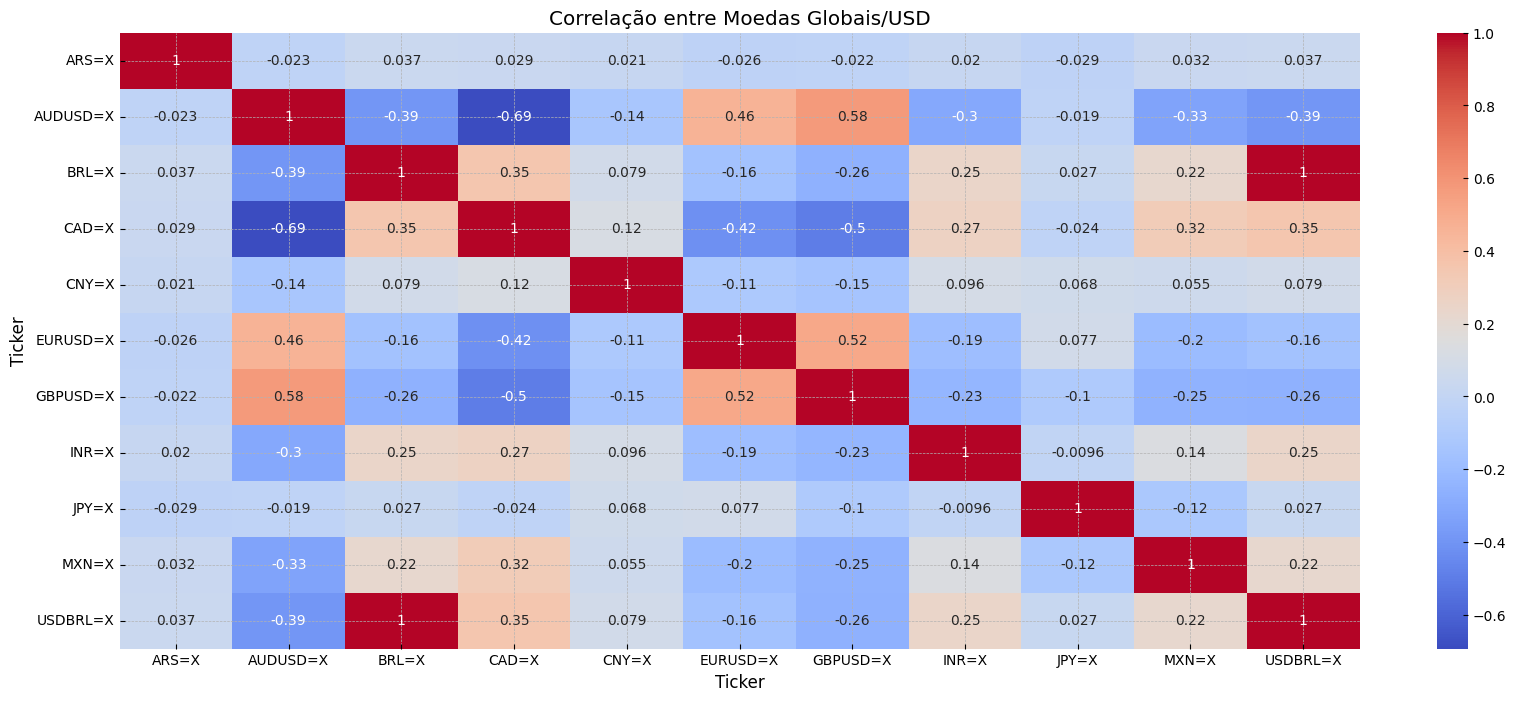

In [ ]:
corelacao=dados_post2_raw.pct_change().corr()
print(corelacao)
fig, ax = plt.subplots(figsize=(20, 8))
sns.heatmap(corelacao, annot=True, cmap='coolwarm', ax=ax)
plt.title('Correlação entre Moedas Globais/USD')

plt.show()

<>:33: SyntaxWarning: invalid escape sequence '\p'
<>:33: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3303297335.py:33: SyntaxWarning: invalid escape sequence '\p'
  plt.savefig('results\post2_brl_dxy.png', dpi=150, bbox_inches='tight') # Salva o gráfico


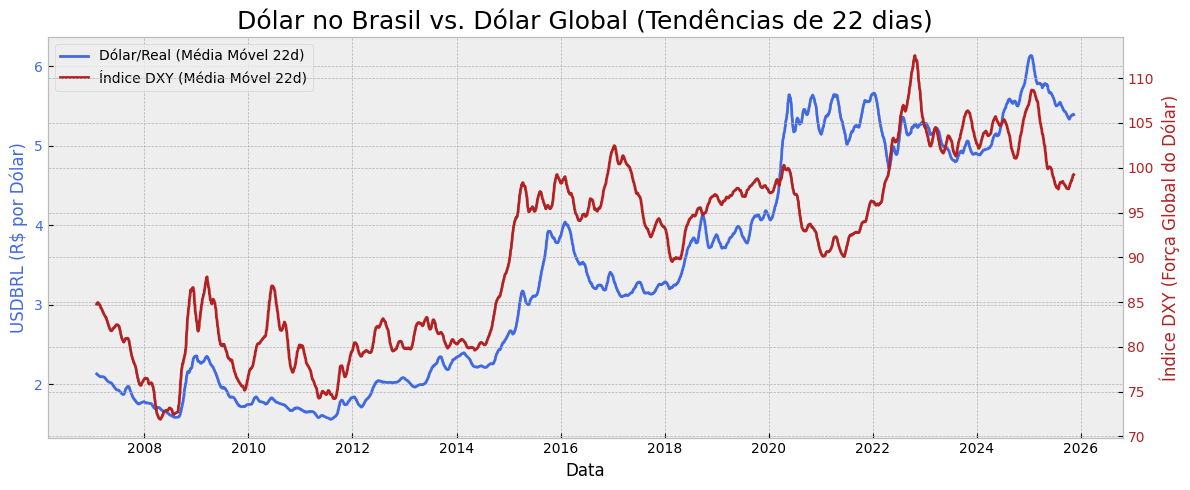

In [ ]:
dados_dxy_brl = dados_post2_raw[['USDBRL=X', 'DX-Y.NYB']].copy()

dados_dxy_brl.rename(columns={'DX-Y.NYB': 'DXY'}, inplace=True)

# --- CÁLCULO DA MÉDIA MÓVEL DE 22 DIAS ---
dados_dxy_brl['USDBRL_MM22'] = dados_dxy_brl['USDBRL=X'].rolling(window=22).mean()
dados_dxy_brl['DXY_MM22'] = dados_dxy_brl['DXY'].rolling(window=22).mean()
dados_dxy_brl.dropna(inplace=True) # Remove NaNs da MM

# --- PLOTAGEM DO GRÁFICO COM DOIS EIXOS ---
fig, ax1 = plt.subplots(figsize=(12, 5))

# Eixo 1 (Esquerda) para o USDBRL
cor_brl = 'royalblue'
ax1.set_xlabel('Data', fontsize=12)
ax1.set_ylabel('USDBRL (R$ por Dólar)', color=cor_brl, fontsize=12)
p1, = ax1.plot(dados_dxy_brl.index, dados_dxy_brl['USDBRL_MM22'], color=cor_brl, label='Dólar/Real (Média Móvel 22d)', linewidth=2)
ax1.tick_params(axis='y', labelcolor=cor_brl)

# Eixo 2 (Direita) compartilhando o mesmo eixo X
ax2 = ax1.twinx()
cor_dxy = 'firebrick'
ax2.set_ylabel('Índice DXY (Força Global do Dólar)', color=cor_dxy, fontsize=12)
p2, = ax2.plot(dados_dxy_brl.index, dados_dxy_brl['DXY_MM22'], color=cor_dxy, label='Índice DXY (Média Móvel 22d)', linewidth=2)
ax2.tick_params(axis='y', labelcolor=cor_dxy)

# Título e Legenda
plt.title('Dólar no Brasil vs. Dólar Global (Tendências de 22 dias)', fontsize=18)
lns = [p1, p2]
ax1.legend(lns, [l.get_label() for l in lns], loc='upper left')

fig.tight_layout()
plt.savefig('results\post2_brl_dxy.png', dpi=150, bbox_inches='tight') # Salva o gráfico
plt.show()

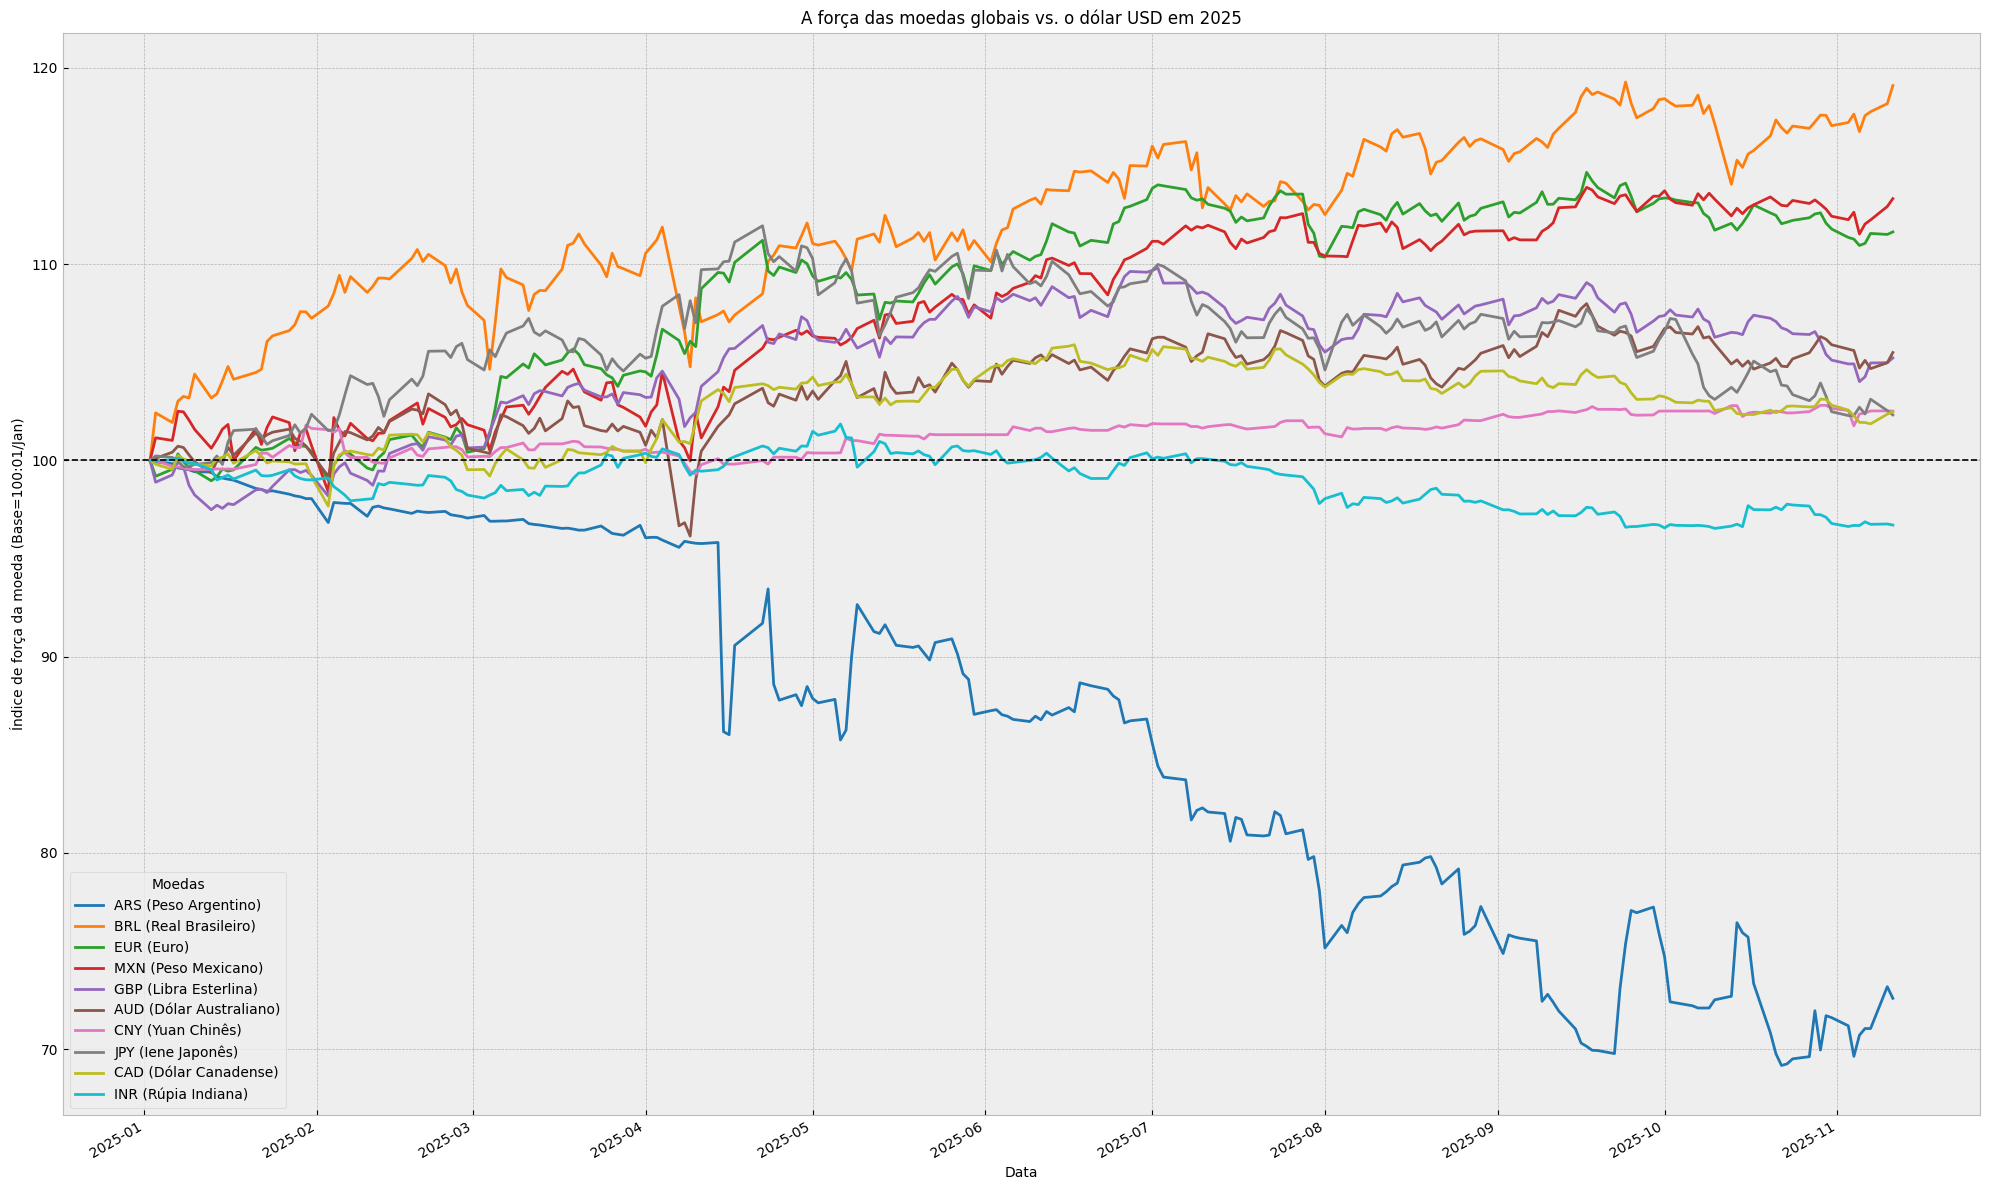

In [ ]:
tickers_2025_nomes = {
    'ARS (Peso Argentino)': 'ARS=X',
    'BRL (Real Brasileiro)': 'USDBRL=X',
    'EUR (Euro)': 'EURUSD=X',
    'MXN (Peso Mexicano)': 'MXN=X',
    'GBP (Libra Esterlina)': 'GBPUSD=X',
    'AUD (Dólar Australiano)': 'AUDUSD=X',
    'CNY (Yuan Chinês)': 'CNY=X',
    'JPY (Iene Japonês)': 'JPY=X',
    'CAD (Dólar Canadense)': 'CAD=X',
    'INR (Rúpia Indiana)': 'INR=X'
}
tickers_2025_lista = list(tickers_2025_nomes.values())

# Filtra os dados de 2025 (já baixados na Célula 12)
dados_2025 = dados_post2_raw[tickers_2025_lista].loc['2025-01-01':].copy()
dados_2025.dropna(inplace=True)

# Padronização (Inversão)
dados_padronizados = pd.DataFrame()
for nome_bonito, ticker in tickers_2025_nomes.items():
    # Observação: USDARS=X agora é obtido diretamente. Verifique seu comportamento
    if ticker.startswith('USD') or len(ticker.replace('=X', '')) == 3: # Observação: USDARS=X agora é obtido diretamente
        dados_padronizados[nome_bonito] = 1 / dados_2025[ticker]
    else:
        dados_padronizados[nome_bonito] = dados_2025[ticker]

# Cálculo do Número-Índice
numero_indice_moedas = dados_padronizados.apply(lambda coluna: (coluna / coluna.iloc[0]) * 100)

# Plotagem
fig, ax = plt.subplots(figsize=(20, 12))
num_moedas = len(numero_indice_moedas.columns)
cores = sns.color_palette("tab10", n_colors=num_moedas)
numero_indice_moedas.plot(ax=ax, color=cores, linewidth=2.0, legend=False)

ax.axhline(100, color='black', linestyle='--', linewidth=1.2)
ax.legend(title="Moedas", loc='lower left')
ax.set_title('A força das moedas globais vs. o dólar USD em 2025', fontsize=12)
ax.set_ylabel('Índice de força da moeda (Base=100:01/Jan)', fontsize=10)
ax.set_xlabel('Data', fontsize=10)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('results/post2_global_2025.png', dpi=150, bbox_inches='tight')
plt.show()

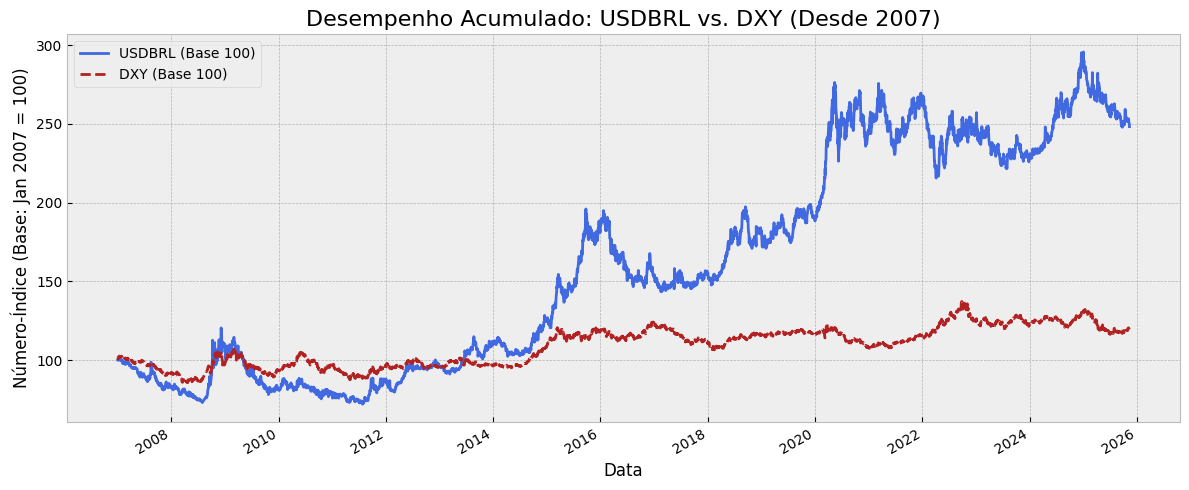

In [ ]:
dados_indice_bruto = dados_post2_raw[['USDBRL=X', 'DX-Y.NYB']].copy() # transformando ^DXY to DX-Y.NYB
dados_indice_bruto.rename(columns={'DX-Y.NYB': 'DXY'}, inplace=True) # transformando ^DXY to DX-Y.NYB

dados_indice_100 = (dados_indice_bruto / dados_indice_bruto.iloc[0]) * 100

fig, ax = plt.subplots(figsize=(12, 5))

dados_indice_100['USDBRL=X'].plot(ax=ax, label='USDBRL (Base 100)', color='royalblue', linewidth=2)
dados_indice_100['DXY'].plot(ax=ax, label='DXY (Base 100)', color='firebrick', linewidth=2, linestyle='--')

ax.set_title('Desempenho Acumulado: USDBRL vs. DXY (Desde 2007)', fontsize=16)
ax.set_ylabel('Número-Índice (Base: Jan 2007 = 100)', fontsize=12)
ax.set_xlabel('Data', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig('results/post2_brl_dxy_indice.png', dpi=150, bbox_inches='tight')
plt.show()